# Рубежный контроль №2

**Лясковский Максим Альбертович**, группа ИУ5-24М.Вариант №2.

## Задание
Необходимо решить задачу кластеризации на основе любого выбранного Вами датасета.

Кластеризовать данные с помощью трех различных алгоритмов кластеризации. Алгоритмы выбираются произвольным образом, рекомендуется использовать алгоритмы из лекции.

Сравнить качество кластеризации для трех алгоритмов с помощью следующих метрик качества кластеризации:

1. Adjusted Rand index
2. Adjusted Mutual Information
3. Homogeneity, completeness, V-measure
4. Коэффициент силуэта

Сделать выводы о том, какой алгоритм осуществляет более качественную кластеризацию на Вашем наборе данных.

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score
from itertools import cycle, islice
import seaborn as sns
import matplotlib.pyplot as plt

# Enable inline plots
%matplotlib inline

# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

Зададим ширину текстового представления данных, чтобы в&nbsp;дальнейшем текст в&nbsp;отчёте влезал на&nbsp;А4<cite data-cite="doc:pandas"></cite>:

In [3]:
pd.set_option("display.width", 70)

In [4]:
# Загружаем датасет
data = pd.read_csv('data/heart-disease-uci.zip')

In [5]:
# Первые 5 строк датасета
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# размер набора данных
data.shape

(303, 14)

In [7]:
# типы колонок
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
# проверим есть ли пропущенные значения
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
def visualize_clusters(cluster_datasets, cluster_results):
    """
    Визуализация результатов кластерного анализа
    """
    plt.subplots(figsize=(10,7))
    plot_num = 0
    for X, y_pred in zip(cluster_datasets, cluster_results):
        plot_num += 1
        plt.subplot(2, 3, plot_num)
        # Цвета точек как результат кластеризации
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # черный цвет для выделяющихся значений
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=3, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.title(datasets_names[plot_num-1])
    
    plt.show()

In [12]:
cluster_results_empty = []
for i in range(6):
    cluster_results_empty.append(np.zeros(1500, dtype=int))

TypeError: string indices must be integers

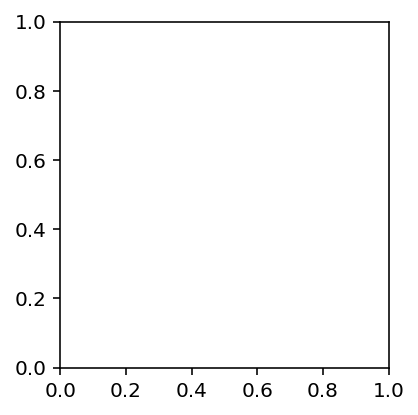

In [19]:
# Нет кластеров
visualize_clusters(data[["age", "target"]], cluster_results_empty)